<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
import io
from js import fetch

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
# Display first few rows
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
# Descriptive statistics
summary_stats = boston_df.describe()
print(summary_stats)

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

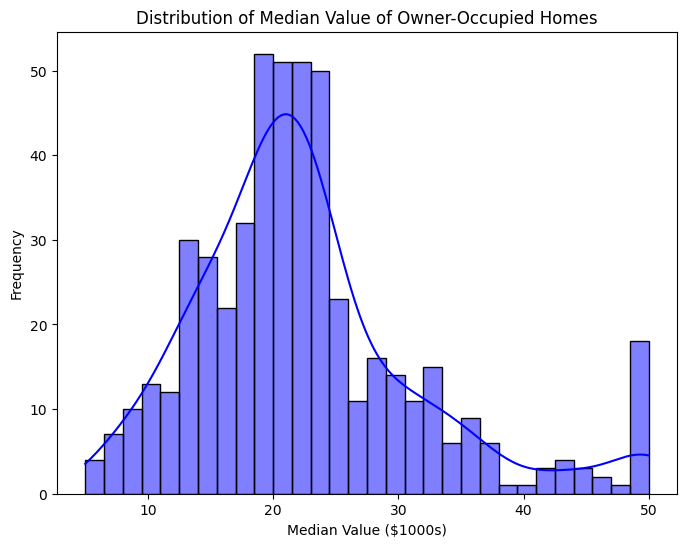

In [8]:
# Visualization: Histogram of Median Value of Owner-Occupied Homes
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['MEDV'], bins=30, kde=True, color='blue')
plt.title('Distribution of Median Value of Owner-Occupied Homes')
plt.xlabel('Median Value ($1000s)')
plt.ylabel('Frequency')
plt.show()

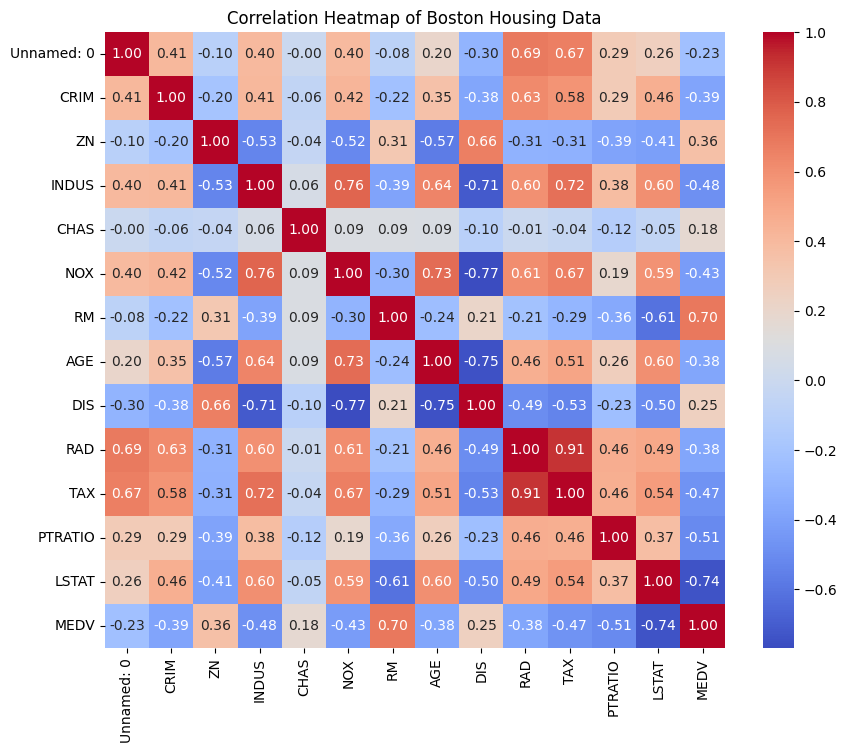

In [9]:
# Additional correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(boston_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Boston Housing Data')
plt.show()


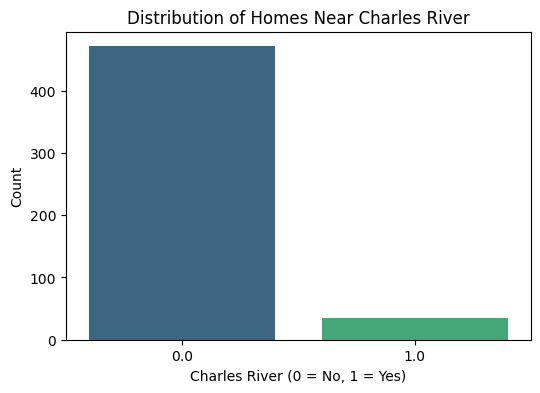

In [11]:
# Visualization: Histogram for Charles River Variable
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df, palette='viridis', hue='CHAS', legend=False)
plt.title('Distribution of Homes Near Charles River')
plt.xlabel('Charles River (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

<ipython-input-12-68c118851fe8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette='coolwarm')


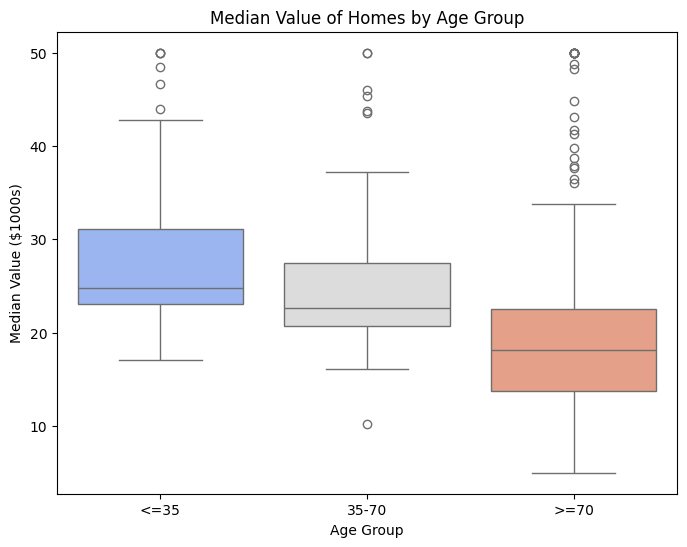

In [12]:
# Visualization: MEDV vs AGE grouped into categories
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>=70'])
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette='coolwarm')
plt.title('Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()

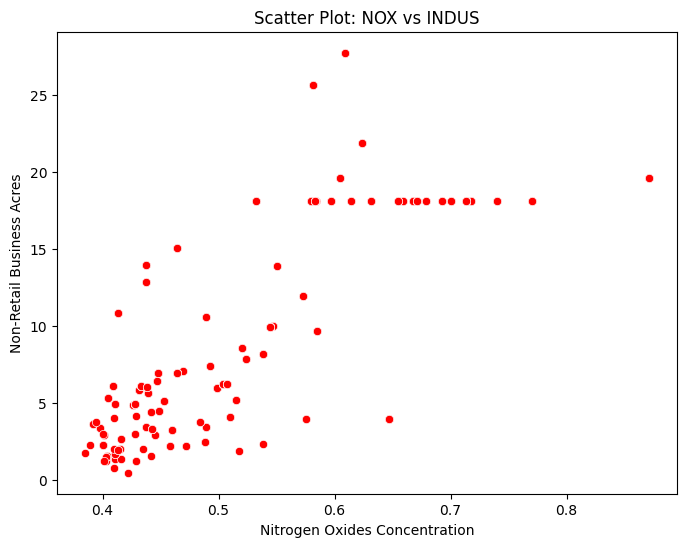

In [13]:
# Scatter Plot: NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df, color='red')
plt.title('Scatter Plot: NOX vs INDUS')
plt.xlabel('Nitrogen Oxides Concentration')
plt.ylabel('Non-Retail Business Acres')
plt.show()

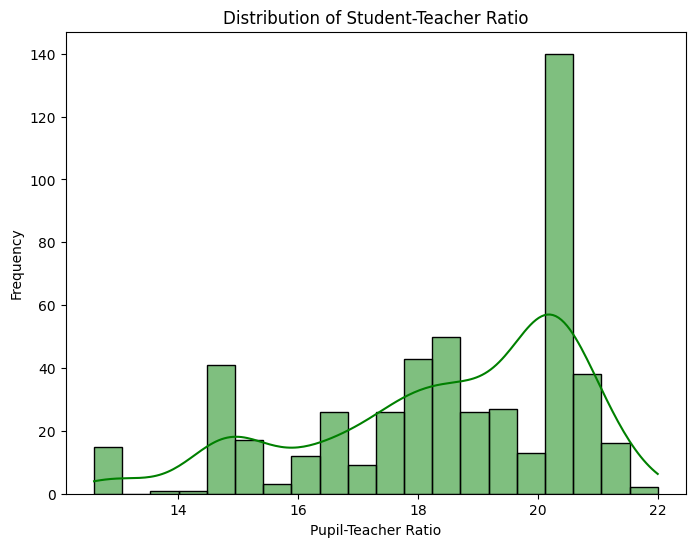

In [14]:
# Histogram for PTRATIO
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True, color='green')
plt.title('Distribution of Student-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

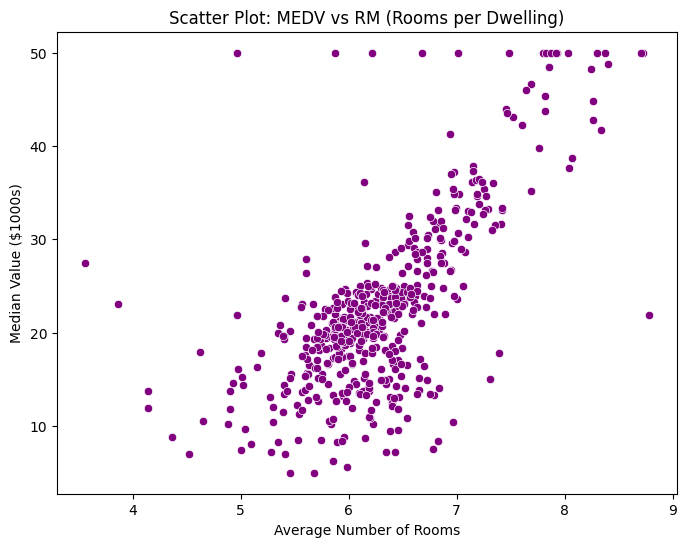

In [15]:
# Additional Visualization: MEDV vs RM (Rooms per dwelling)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='RM', y='MEDV', data=boston_df, color='purple')
plt.title('Scatter Plot: MEDV vs RM (Rooms per Dwelling)')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median Value ($1000s)')
plt.show()

In [16]:
# Statistical Test 1: T-Test for MEDV by CHAS
print("\nT-Test: Checking if there is a significant difference in MEDV based on CHAS")
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
t_stat, p_value = stats.ttest_ind(medv_chas_0, medv_chas_1, equal_var=False)
print(f'T-Test: t-statistic={t_stat:.3f}, p-value={p_value:.3f}')


T-Test: Checking if there is a significant difference in MEDV based on CHAS
T-Test: t-statistic=-3.113, p-value=0.004


In [17]:
# Statistical Test 2: ANOVA for MEDV by AGE Group
print("\nANOVA: Testing if there is a significant difference in MEDV across AGE groups")
anova_model = ols('MEDV ~ C(AGE_group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)


ANOVA: Testing if there is a significant difference in MEDV across AGE groups
                    sum_sq     df         F        PR(>F)
C(AGE_group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


In [18]:
# Statistical Test 3: Pearson Correlation between NOX and INDUS
print("\nPearson Correlation: Checking relationship between NOX and INDUS")
corr, p_corr = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f'Pearson Correlation: correlation={corr:.3f}, p-value={p_corr:.3f}')


Pearson Correlation: Checking relationship between NOX and INDUS
Pearson Correlation: correlation=0.764, p-value=0.000


In [19]:
# Statistical Test 4: Regression Analysis of DIS on MEDV
print("\nRegression Analysis: Checking impact of DIS on MEDV")
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']
reg_model = sm.OLS(y, X).fit()
print(reg_model.summary())


Regression Analysis: Checking impact of DIS on MEDV
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           1.21e-08
Time:                        10:33:45   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [20]:
# Checking Multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = boston_df[['DIS', 'RM', 'LSTAT']]
variables = sm.add_constant(variables)
vif_data = pd.DataFrame()
vif_data['Feature'] = variables.columns
vif_data['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
print("\nVariance Inflation Factor (VIF) Analysis:")
print(vif_data)


Variance Inflation Factor (VIF) Analysis:
  Feature         VIF
0   const  190.968162
1     DIS    1.356834
2      RM    1.639321
3   LSTAT    2.085357
